In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import FastText
from sklearn.cluster import KMeans
from utils import (get_embedding, get_embedding_2DTSNE, get_object_types,
                   tokenize_plan, plot_vocabulary_kmeans,
                   plot_vocabulary_2DTSNE)

TRAIN_URL = "https://www.famaf.unc.edu.ar/~nocampo043/training-instances.parquet.gzip"
TEST_URL = "https://www.famaf.unc.edu.ar/~nocampo043/evaluation-instances.parquet.gzip"

df_train = pd.read_parquet(TRAIN_URL)
df_test = pd.read_parquet(TEST_URL)

## FastText

In [2]:
sentences = df_train["relaxed_plan"].to_numpy()
fasttext = FastText(sentences=[tokenize_plan(s) for s in sentences],
                    min_count=1,
                    vector_size=100,
                    window=7)

## TSNE

In [3]:
model = fasttext.wv
vocab = fasttext.wv.index_to_key

embedding = get_embedding(vocab, model)
embedding_TSNE = get_embedding_2DTSNE(vocab, model)
X = embedding.drop(columns=["word"]).to_numpy()
X_TSNE = embedding_TSNE.drop(columns=["word"]).to_numpy()

## KMeans

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

## Object type

In [5]:
obj_types, obj_indices = get_object_types(vocab)

## Plots

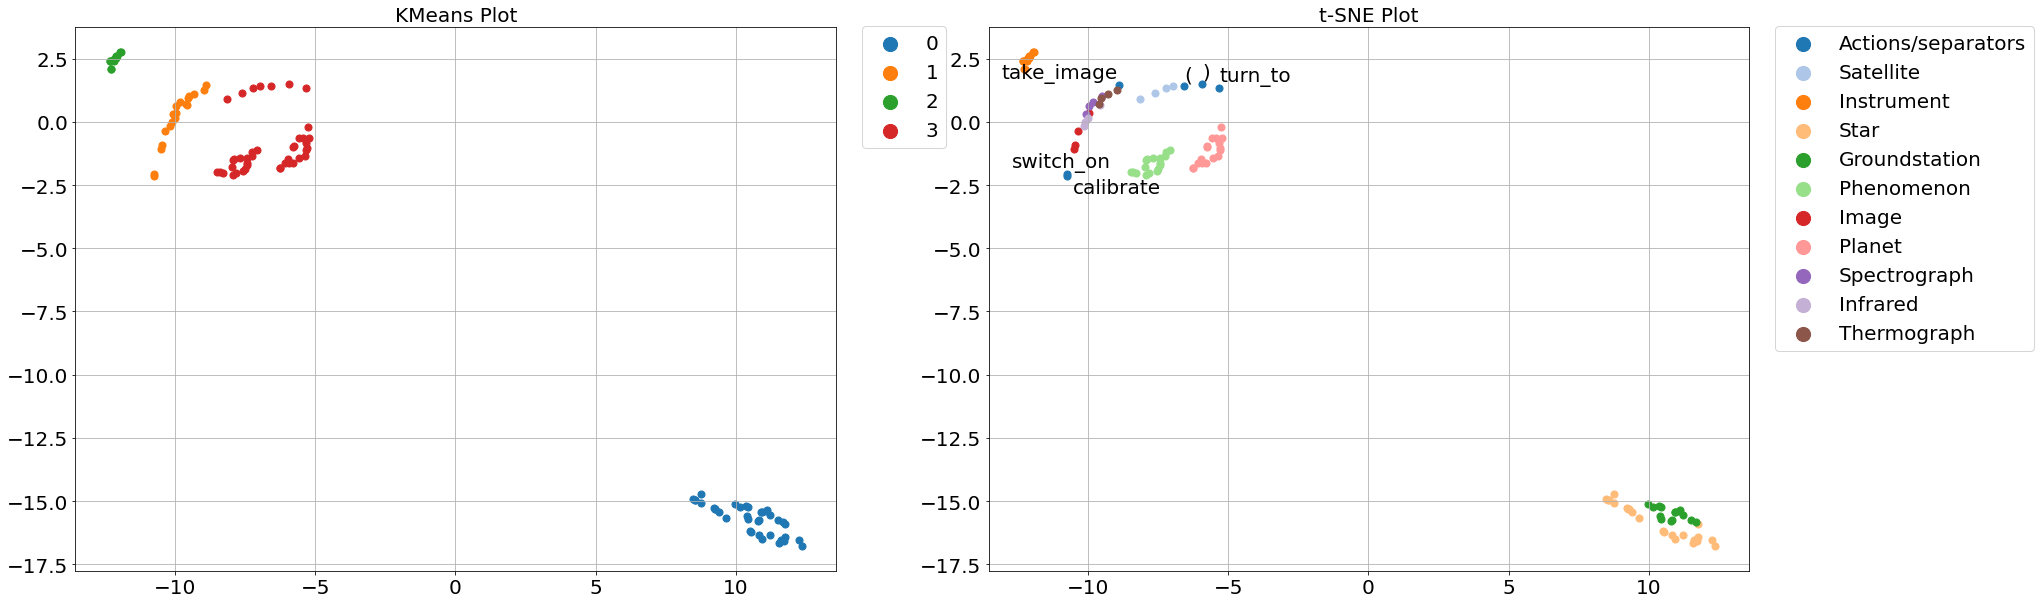

In [6]:
_, (ax_kmeans, ax_tsne) = plt.subplots(1, 2, figsize=(30, 10))
plot_vocabulary_2DTSNE(X_TSNE, vocab, obj_types, obj_indices, ax_tsne)
plot_vocabulary_kmeans(X_TSNE, kmeans, ax_kmeans)
ax_kmeans.grid()
ax_tsne.grid()

## 